In [1]:
import fpy
import m3dc1 as m
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sim = fpy.sim_data(filename = '/home/jfernandes/Software/maglib_local/maglit/our_m3dc1_data/i_coils/n03/C1.h5')

In [3]:
xmag = sim.get_time_trace('xmag')
zmag = sim.get_time_trace('zmag')
print(xmag.values[0])
print(zmag.values[0])


0.62476635
0.006107933


In [4]:
xnull = sim.get_time_trace('xnull')
znull = sim.get_time_trace('znull')
print(xnull.values[0])
print(znull.values[0])

0.46950445
-0.21327174


In [5]:
#create 2D mesh grid inside region r = [0.435, 0.81]x[-2.4, 2.4]
n = 100
x = np.linspace(0.435, 0.81, n)
y = np.linspace(-0.24, 0.24, n)
X, Y = np.meshgrid(x, y)

#evaluate psi on the mesh grid
Z = np.zeros(X.shape)
for i in range(n):
    for j in range(n):
        Z[i,j] = m.eval_field("psi", X[i,j], 0, Y[i,j], coord='scalar', sim=sim, time=0)

Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating fie

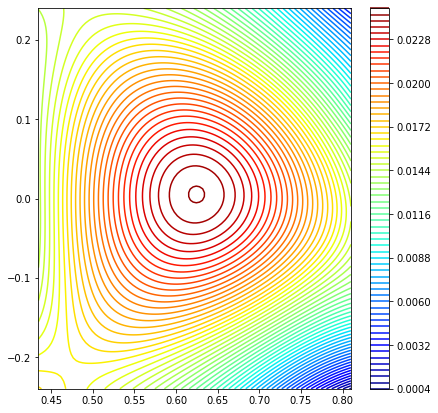

In [10]:
#print psi
plt.figure(figsize=(7,7))
plt.contour(X, Y, Z, 75, cmap='jet')
plt.colorbar()
plt.ylim(-0.24, 0.24)
plt.show()

In [7]:
def eval_field_derivative(m, x, phi, y, sim, time, h=1e-5):
    """Numerically estimate the gradient and Hessian of the field."""
    f_xy = m.eval_field("psi", x, phi, y, coord='scalar', sim=sim, time=time)

    # Partial derivatives (central differences)
    f_x1 = m.eval_field("psi", x + h, phi, y, coord='scalar', sim=sim, time=time)
    f_x2 = m.eval_field("psi", x - h, phi, y, coord='scalar', sim=sim, time=time)
    f_y1 = m.eval_field("psi", x, phi, y + h, coord='scalar', sim=sim, time=time)
    f_y2 = m.eval_field("psi", x, phi, y - h, coord='scalar', sim=sim, time=time)

    dfdx = (f_x1 - f_x2) / (2 * h)
    dfdy = (f_y1 - f_y2) / (2 * h)

    # Second partial derivatives (central differences)
    f_xx = (f_x1 - 2 * f_xy + f_x2) / (h ** 2)
    f_yy = (f_y1 - 2 * f_xy + f_y2) / (h ** 2)

    f_xy1 = m.eval_field("psi", x + h, phi, y + h, coord='scalar', sim=sim, time=time)
    f_xy2 = m.eval_field("psi", x - h, phi, y + h, coord='scalar', sim=sim, time=time)
    f_xy3 = m.eval_field("psi", x + h, phi, y - h, coord='scalar', sim=sim, time=time)
    f_xy4 = m.eval_field("psi", x - h, phi, y - h, coord='scalar', sim=sim, time=time)

    d2fdxdy = (f_xy1 - f_xy2 - f_xy3 + f_xy4) / (4 * h ** 2)

    gradient = np.array([dfdx, dfdy])
    hessian = np.array([[f_xx, d2fdxdy], [d2fdxdy, f_yy]])

    return gradient, hessian

def newton_raphson(m,x0, phi, y0, sim, time, tol=1e-6, max_iter=1000):
    x, y = x0, y0
    for _ in range(max_iter):
        grad, hess = eval_field_derivative(m, x, phi, y, sim, time)
        if np.linalg.norm(grad) < tol:
            return x, y
        try:
            hess_inv = np.linalg.inv(hess)
        except np.linalg.LinAlgError:
            print("Hessian is singular, cannot invert.")
            return None
        delta = -hess_inv @ grad
        x, y = x + delta[0], y + delta[1]
        if np.linalg.norm(delta) < tol:
            return x, y
    return None

x0, y0 = 0.45, -0.18  # Initial guess
phi = 0.2*np.pi # Poloidal cut position
saddle_point = newton_raphson(m,x0, phi, y0, sim, 0)
if saddle_point:
    print("Saddle point found at:", saddle_point)
else:
    print("No saddle point found.")

Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  

[DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Evaluating field 'psi'...  [DONE]
Saddle point found at: (0.4698660634246061, -0.2134422706264537)


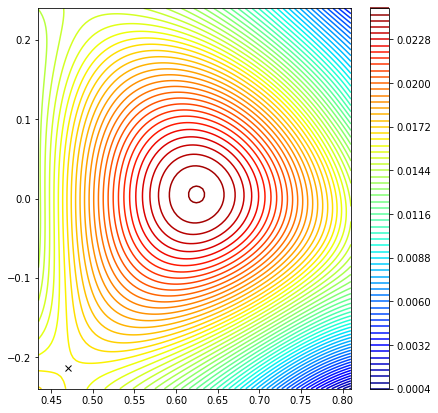

In [8]:
#print psi
plt.figure(figsize=(7,7))
plt.contour(X, Y, Z, 70, cmap='jet')
#print saddle point
plt.plot(saddle_point[0], saddle_point[1], marker="x", color="k")
plt.colorbar()
plt.ylim(-0.24, 0.24)
plt.show()